<a href="https://colab.research.google.com/github/Dipak22/DeepLearning/blob/master/DeepLearn_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


## Data Preparation and loading
* Get data in a numerical format
* design model with weights, and improve the weight to solve the problems

In [2]:
# create a sample data
# use a linear regression formula to make a straight line with know parameters
weight = 0.7
bias = 0.3
X = torch.arange(0,1,0.02).unsqueeze(dim=1)

y = weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

## Splitting data into training and test sets


In [4]:
#create train and test sets
train_split = int(0.8* len(X))
X_train, y_train =X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]
len(X_train),len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots tytraing, test data and compares predictions
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label ='Training data')

  # plot test data
  plt.scatter(test_data, test_labels, c='g', s=4, label = 'Test data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
  #show legend
  plt.legend(prop={'size':14});

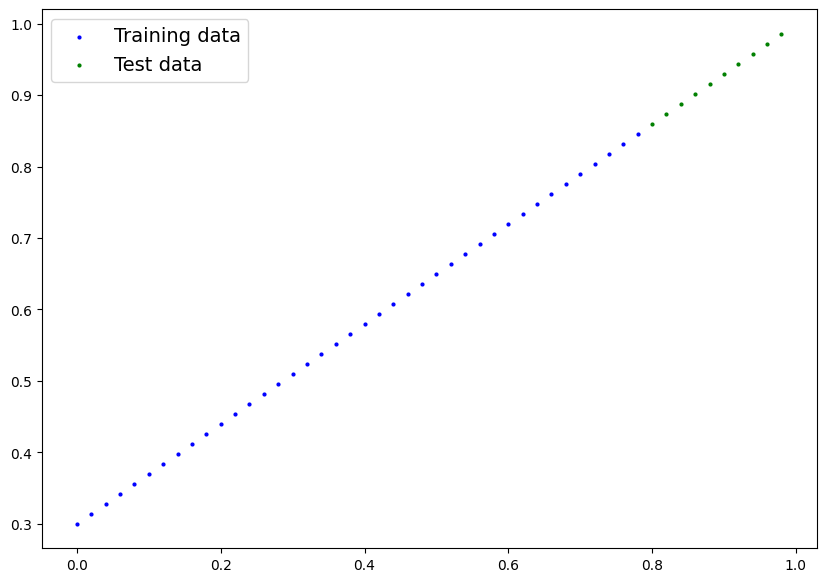

In [6]:
plot_predictions()

## Build Model

In [20]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #initialize model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))
  #forward method to define the computation of the model
  def forward(self, x: torch.Tensor)-> torch.Tensor:
      return self.weights*x + self.bias

## Pytorch model building essentials
* torch.nn -> helps create a computational graph
* nn.Parameters -> parameters to used in the model
* nn.Module -> base class for all nn modules, overwrite the forward method
* torch.optim -> all optimizers are defined here


## checking contents of our pytorch model

In [21]:
torch.manual_seed(42)
#create an instance of the model
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [22]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [24]:
weight, bias

(0.7, 0.3)

## Make prediction using torch.inference_model


In [26]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds, y_preds.shape

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 torch.Size([10, 1]))

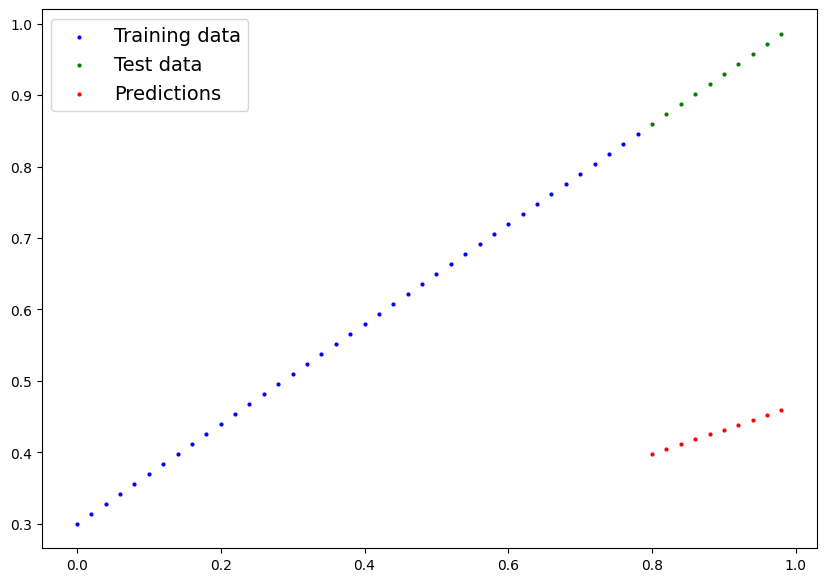

In [28]:
plot_predictions(predictions = y_preds)

## Training a machine learning model,
optimizing the parameters of the model, to make the predictions as close to target.

to mearsure the quality of the prediction , use loss functions

use optimizer to adjust the model parameters to update the parameters inorder to reduce the loss

In [38]:
#setup loss function
loss_fn = nn.L1Loss()
#setup optimizer(SGD)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01,
                            )

## Building a training loop(and testing loop) in pytorch

0. loop through the data
1. forward pass (data moving in the forward model) to make the predictions.
2. calculate the loss
3. optimizer zero grad
4. loss backward  calcualte the gradients of each parameters(back propagation)
5. optimizer step - update the parameters value(gradient descent)


In [37]:
nn.MSELoss()(y_test, y_preds)

tensor(0.2450)

In [88]:
torch.manual_seed(42)
epochs = 5
epoch_count = []
loss_values = []
test_loss_values = []
## Training
# loop through the data
for epoch in range(epochs):
  #set model to traing mode
  model_0.train()
  #forward pass
  y_pred = model_0(X_train)
  #calcualte loss
  loss= loss_fn(y_pred, y_train)
  #zero grad
  optimizer.zero_grad()
  # perform back propagation on the loss
  loss.backward()
  #step the optimizer
  optimizer.step()

  #eval on test data
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(y_test)
  test_loss = loss_fn(test_pred, y_test)
  print(f"Epoch: {epoch} | loss : {loss:.3f} | Test loss: {test_loss:.3f}")
  epoch_count.append(epoch)
  loss_values.append(loss)
  test_loss_values.append(test_loss)


Epoch: 0 | loss : 0.003 | Test loss: 0.032
Epoch: 1 | loss : 0.009 | Test loss: 0.018
Epoch: 2 | loss : 0.003 | Test loss: 0.032
Epoch: 3 | loss : 0.009 | Test loss: 0.018
Epoch: 4 | loss : 0.003 | Test loss: 0.032


In [97]:
test_loss_values

[tensor(0.0315),
 tensor(0.0182),
 tensor(0.0315),
 tensor(0.0182),
 tensor(0.0315)]

Text(0, 0.5, 'Loss')

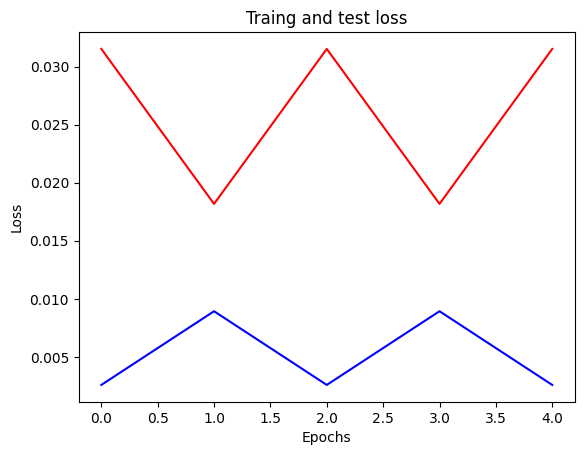

In [96]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(),c='b', label = 'Train loss')
plt.plot(epoch_count, test_loss_values, c='r',label='Test loss')
plt.title('Traing and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


In [86]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [76]:
weight, bias

(0.7, 0.3)

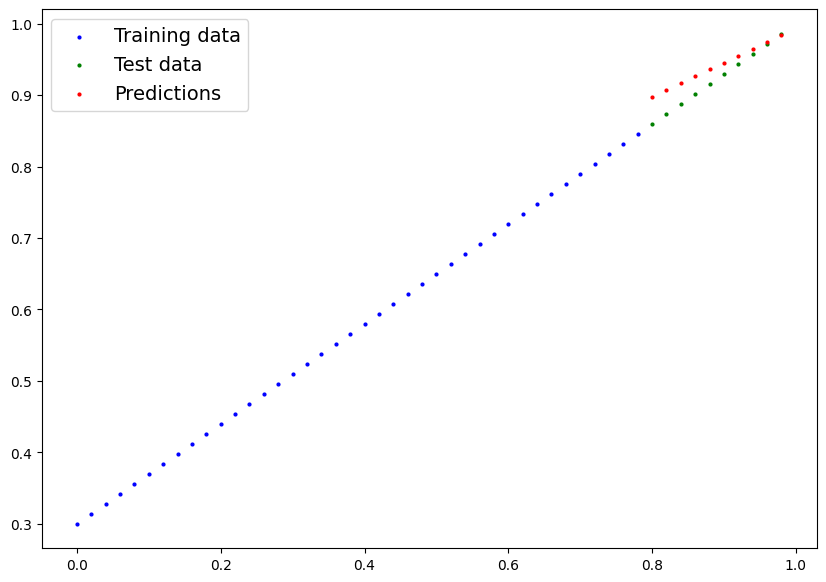

In [87]:
with torch.inference_mode():
  y_preds_new = model_0(y_test)

plot_predictions(predictions=y_preds_new)

## Saving a model  in Pytorch
1. `torch.save()` - allows to save tensor object in disk
2. `torch.load()` - load the saved object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary.


In [98]:
#Saving our pytorch model
from pathlib import Path
# 1. create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok=True)
#2. create models save path
MODEL_NAME = '01_pytorch_workflow.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow.pth')

In [99]:
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [102]:
!ls -ltr models

total 4
-rw-r--r-- 1 root root 1568 Mar  4 16:44 01_pytorch_workflow.pth


In [104]:
loaded_model_0 = LinearRegressionModel()
print(loaded_model_0.state_dict())
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
print(loaded_model_0.state_dict())

OrderedDict([('weights', tensor([-1.1229])), ('bias', tensor([-0.1863]))])
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


<ipython-input-104-1ad887f5d10f>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


## Putting it all together


In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [2]:
device ='cuda' if torch.cuda.is_available() else 'cpu'


In [3]:
device

'cuda'

In [5]:
#create some data using linear regression y = mx+b
weight =0.7
bias = 0.1
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1140],
         [0.1280],
         [0.1420],
         [0.1560],
         [0.1700],
         [0.1840],
         [0.1980],
         [0.2120],
         [0.2260]]))

In [6]:
#split data
train_split =int(0.8*len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots tytraing, test data and compares predictions
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label ='Training data')

  # plot test data
  plt.scatter(test_data, test_labels, c='g', s=4, label = 'Test data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
  #show legend
  plt.legend(prop={'size':14});

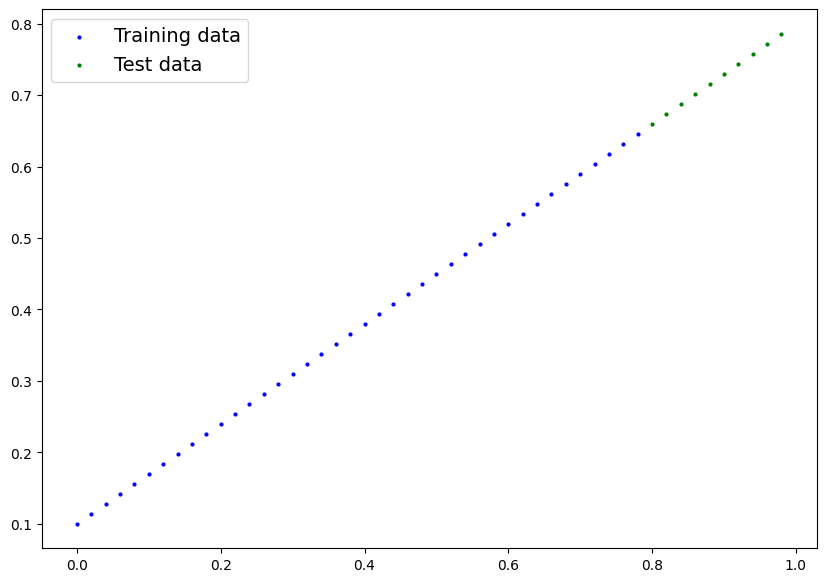

In [8]:
plot_predictions(X_train,y_train, X_test, y_test)

In [15]:
## Build pytorch linear model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)



In [17]:
  #set manual seed
  torch.manual_seed(42)
  model_1 = LinearRegressionModelV2()
  model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [20]:
#set model to use target device
next(model_1.parameters()).device

device(type='cpu')

In [21]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [22]:
next(model_1.parameters()).device

device(type='cuda', index=0)

## Training

In [23]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.01)

In [25]:
#training loop
torch.manual_seed(seed=42)
epochs = 200
#put data on target device
X_train = X_train.to(device=device)
y_train = y_train.to(device=device)
X_test = X_test.to(device=device)
y_test = y_test.to(device=device)
for epoch in range(epochs):
  model_1.train()
  #forward pass
  y_pred = model_1(X_train)
  #calculate loss
  loss = loss_fn(y_pred, y_train)
  #optimizer zero grad
  optimizer.zero_grad()
  #perform back propagation
  loss.backward()
  #optimizer step
  optimizer.step()

  ##Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch%10==0:
    print(f"Epoch : {epoch} | train loss : {loss:.2f} | test loss : {test_loss:.2f}")

Epoch : 0 | train loss : 0.76 | test loss : 0.77
Epoch : 10 | train loss : 0.64 | test loss : 0.64
Epoch : 20 | train loss : 0.52 | test loss : 0.50
Epoch : 30 | train loss : 0.41 | test loss : 0.37
Epoch : 40 | train loss : 0.29 | test loss : 0.24
Epoch : 50 | train loss : 0.18 | test loss : 0.10
Epoch : 60 | train loss : 0.06 | test loss : 0.03
Epoch : 70 | train loss : 0.04 | test loss : 0.07
Epoch : 80 | train loss : 0.03 | test loss : 0.07
Epoch : 90 | train loss : 0.03 | test loss : 0.07
Epoch : 100 | train loss : 0.03 | test loss : 0.06
Epoch : 110 | train loss : 0.02 | test loss : 0.05
Epoch : 120 | train loss : 0.02 | test loss : 0.04
Epoch : 130 | train loss : 0.02 | test loss : 0.03
Epoch : 140 | train loss : 0.01 | test loss : 0.03
Epoch : 150 | train loss : 0.01 | test loss : 0.02
Epoch : 160 | train loss : 0.00 | test loss : 0.01
Epoch : 170 | train loss : 0.00 | test loss : 0.01
Epoch : 180 | train loss : 0.00 | test loss : 0.01
Epoch : 190 | train loss : 0.00 | test los

In [27]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6919]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0995], device='cuda:0'))])

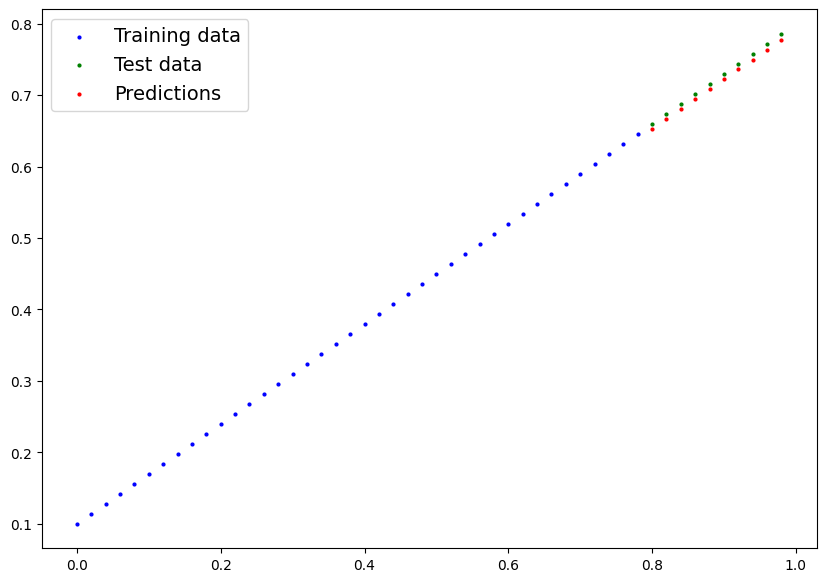

In [30]:
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions=y_preds.cpu().numpy())

In [31]:
from pathlib import Path
MODEL_PATH  = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME ='01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_1.pth')

In [32]:
torch.save(f=MODEL_SAVE_PATH, obj=model_1.state_dict())

In [33]:
loaded_model_1 = LinearRegressionModelV2()
print(loaded_model_1.state_dict())
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
print(loaded_model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
OrderedDict([('linear_layer.weight', tensor([[0.6919]])), ('linear_layer.bias', tensor([0.0995]))])


<ipython-input-33-f8825fd83da4>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


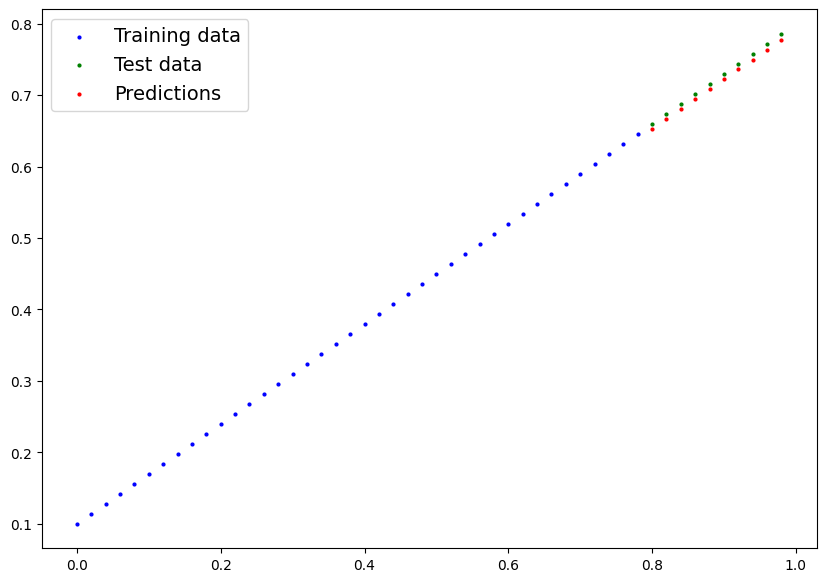

In [37]:
with torch.inference_mode():
  y_preds = loaded_model_1(X_test.cpu())

plot_predictions(predictions=y_preds.cpu().numpy())

In [35]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [38]:
X_test.device

device(type='cuda', index=0)